# Ejemplo 01: Entrenamiento de un algoritmo de K-means

Este ejemplo simple muestra como es que se puede hacer la división entre entrenamiento / prueba y como se entrena por medio de k-means. La fase de prueba y uso será abordada en ejemplos mas adelante

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

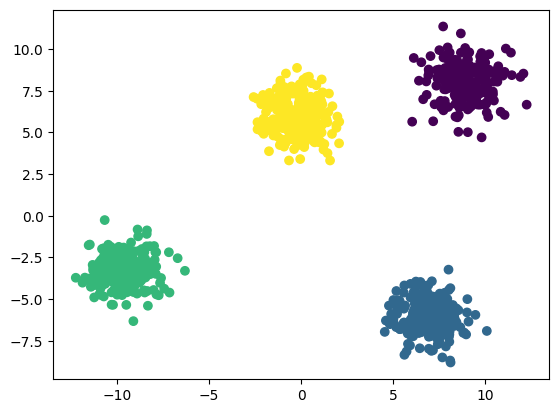

In [ ]:
x, y = make_blobs(n_samples = 1000, centers=4, n_features = 2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

Tomamos el dataset de entrenamiento y ajustamos los centroides. K es el número de clases que queremos, por ejemplo: n_clusters = 4 es para 4 clases

In [ ]:
K = 4
#Dividimos entre train y test.
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.4)
#Entrenamos con x_train..
modelo_kmeans = KMeans(n_clusters=K).fit(x_train)
#Y extraemos los centroides
centroides = modelo_kmeans.cluster_centers_
print(centroides)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-0.11438844  6.01194773]
 [-9.71105518 -3.36800513]
 [ 6.86134563 -5.95701511]
 [ 8.98043141  8.01728499]]


## Ejemplo 02:
Este ejemplo sirve para obtener la moda de un conjunto de datos. Nos será muy útil para calcular la Accuracy!

In [ ]:
from scipy import stats

def obtenerModa(resultadoModa):
  moda=(stats.mode(resultadoModa)[0]).reshape(-1)
  return moda[0]

# Ejemplo 03: Sistema de recomendación con K-medias

Este es un sistema de recomendación: los sistemas de recomendación estan en todos lados (netflix, amazon, etc), y vamos a crear uno basado en K-medias. Para ello, vamos empezando por cargar un dataset de películas en formato CSV, que puse en este repositorio

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
df_pelis = pd.read_csv('/content/drive/MyDrive/DataSets3_TCH/dataset_peliculas.csv')
df_pelis.head()

,Nombre,cantidad de accion,cantidad de romance,tipo
0,Robocop,0.90,0.00,accion
1,Terminator,0.88,0.10,accion
2,Dia de la independencia,0.90,0.11,accion
3,Mision Imposible,0.90,0.11,accion
4,Bourne,0.90,0.20,accion


## **Transformando en datasets de entrenamiento y prueba.**
Ahora, vamos a tomar las columnas "cantidad de accion" y "cantidad de romance", y vamos a transformarlas en nuestras variables a clasificar por K-medias. Como aqui tengo acción y romance, hay que mappear "accion" a 0, y "romance" a 1, para hacer un dataset de entrenamiento y prueba.

In [ ]:
x = df_pelis[['cantidad de accion', 'cantidad de romance']].to_numpy()
y = df_pelis['tipo'].map({
    'acciion': 0,
    'romance': 1
}).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

## **Centroides.**
Una vez mappeado, vamos a entrenar el algoritmo de K-medias de forma automática, y extraigamos los centroides obtenidos.

In [ ]:
modelo_kmeans = KMeans(n_clusters=2).fit(x_train)
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[0.88285714 0.12285714]
 [0.1        0.9       ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## **Sistema de recomendación.**
Muy bien! ya tenemos los datos, centroides, y estamos listos para crear un sistema que nos recomiende películas. Para ello usaremos la librería MLUtilites que hemos estado construyendo en esta sesion.

In [ ]:
import os
import sys
sys.path.append('/content/drive/MyDrive/DataSets3_TCH/')
import MLUtilities as utils

Esta función va a recibir la lista de todas las peliculas (solo el texto), los datos de todas las películas (igual que como sacamos X), la pelicula ejemplo (Los valores de cantidad de acción y cantidad de romance), y los centroides de Kmeans.

In [ ]:
def recomiendamePelis(listaDePelis, datosPelis, pelisEjemplo, centroides):
  #Vamos a buscar el centroide mas cercano (con MLUtilities)
  clasificacionDeseada = utils.centroideCercano(pelisEjemplo, centroides)

  #Luego, vamos a clasificar todas las peliculas por centroides
  clasificaciones = utils.clasificarPorCentroides(datosPelis, centroides)

  #Finalmente, sacaremos los indices que hacen match entre clasificaciones
  indices = np.where(clasificaciones == clasificacionDeseada)[0]

  #Y regresamos la lista de peliculas
  return listaDePelis[indices]

## **Recomiendame una película!**
Elige un índice del dataframe (por decir algo... 5), y extrae la película que elegiste. Luego extrae sus características, y pide las recomendaciones!

In [ ]:
#Sientete libre de cambiar este valor
indice_df = 5

#Extrae la pelicula que deseas del dataframe
peliculaElegida = df_pelis.iloc[indice_df]

#Obten las caracteristicas de la pelicula que elegiste
caracteristicasPelicula = peliculaElegida[['cantidad de accion', 'cantidad de romance']].to_numpy()

#Obten la lista de recomendaciones
recomendaciones = recomiendamePelis(df_pelis['Nombre'], x, caracteristicasPelicula, centroides)

#E imprime lo que hallaste
print('Porque viste '+peliculaElegida['Nombre']+'...')
print(recomendaciones)

Porque viste Rambo...
0                     Robocop
1                  Terminator
2     Dia de la independencia
3            Mision Imposible
4                      Bourne
5                       Rambo
6                       Rocky
9            Operación Dragon
10          Tiempos Violentos
11                     Django
14       Bastardos sin gloria
15            Sherlock Holmes
16                 James bond
17          El último samurai
Name: Nombre, dtype: object
